In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Imports as needed
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Declare Base 
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
#Find column names for Measurement Table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find Column Names for Station Table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
engine.execute('SELECT Date FROM Measurement ORDER BY Date DESC LIMIT 1').fetchall()

[('2017-08-23',)]

In [14]:
#Initial Query of measurement table tabl
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
#Initial Query of station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

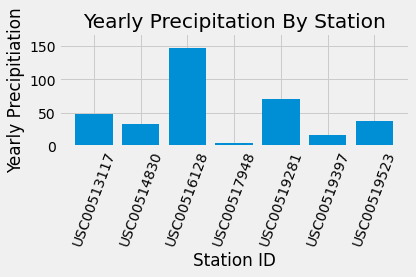

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Find the most recent date in the data set.
MostRecentDate = engine.execute('SELECT Date FROM Measurement ORDER BY Date DESC LIMIT 1').fetchall()

#Checkscript
#print(MostRecentDate)

#Convert List containing MostRecentDate into a dataframe
MostRecentDate_df = pd.DataFrame (MostRecentDate, columns = ['MostRecentDate'])

#Review Dataframe with MostRecentDate 
#MostRecentDate_df.head()

#Check Datatype of column 
#MostRecentDate_df.dtypes

#Convert Column datatype from object to datetime
MostRecentDate_df['MostRecentDate'] = pd.to_datetime(MostRecentDate_df['MostRecentDate'])

#Check Datatype of column 
#MostRecentDate_df.dtypes

# Calculate the date one year from the last date in data set.
MostRecentDate_df['RecentDateOneYearPrior'] = MostRecentDate_df['MostRecentDate'] - pd.DateOffset(years=1)

#Review Dataframe with MostRecentDate and oneyearprior values 
#MostRecentDate_df.head()


# Perform a query to retrieve the data and precipitation scores
# Find the most recent date in the data set.
OneYearPrecipitationData = engine.execute("SELECT * FROM Measurement WHERE Date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY Date ASC").fetchall()

#Checkscript
#print(OneYearPrecipitationData)


# Save the query results as a Pandas DataFrame and set the index to the date column
#Convert List containing MostRecentDate into a dataframe
OneYearPrecipitationData_df = pd.DataFrame(OneYearPrecipitationData, columns = ['id','station','date','prcp','tobs'])

#Review Dataframe with MostRecentDate 
#OneYearPrecipitationData_df.head()

#Check Datatype of column 
OneYearPrecipitationData_df.dtypes

#Convert Column datatype from object to datetime
OneYearPrecipitationData_df['date'] = pd.to_datetime(OneYearPrecipitationData_df['date'])

#Check Datatype of column 
#OneYearPrecipitationData_df.dtypes

# Sort the dataframe by date
OneYearPrecipitationData_df = OneYearPrecipitationData_df.sort_values(by='date',ascending=True)

#Checkscript - 2,230 Records Returned
#OneYearPrecipitationData_df.head(2230)


#OneYearPrecipitationData_df['prcp']


#Grouping Precipitation data by stations"
OneYearPrecipitationData_df = OneYearPrecipitationData_df.groupby(by=['station'])['prcp'].sum()

#Convert List containing MostRecentDate into a dataframe
OneYearPrecipByStation_df = pd.DataFrame(OneYearPrecipitationData_df, columns = ['id','station','date','prcp','tobs'])

del OneYearPrecipByStation_df['id']
del OneYearPrecipByStation_df['station']
del OneYearPrecipByStation_df['date']
del OneYearPrecipByStation_df['tobs']

OneYearPrecipByStation_df.reset_index(inplace=True)

OneYearPrecipByStation_df = OneYearPrecipByStation_df.rename(columns={'station': 'station'})

#Final Data Pull
#OneYearPrecipByStation_df.head(10)

#print(OneYearPrecipByStation_df)

#Populate the Empty Lists
StationList = OneYearPrecipByStation_df['station']
OneYearPrecipList = OneYearPrecipByStation_df['prcp']


#Checkscript
#print(OneYearPrecipList)
#print(StationList)
                     

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(StationList,OneYearPrecipList)
plt.ylim(0, 170)
plt.xticks(StationList, rotation = 70)
plt.title("Yearly Precipitation By Station")
plt.xlabel("Station ID")
plt.ylabel("Yearly Precipitiation")
plt.tight_layout()
plt.show();

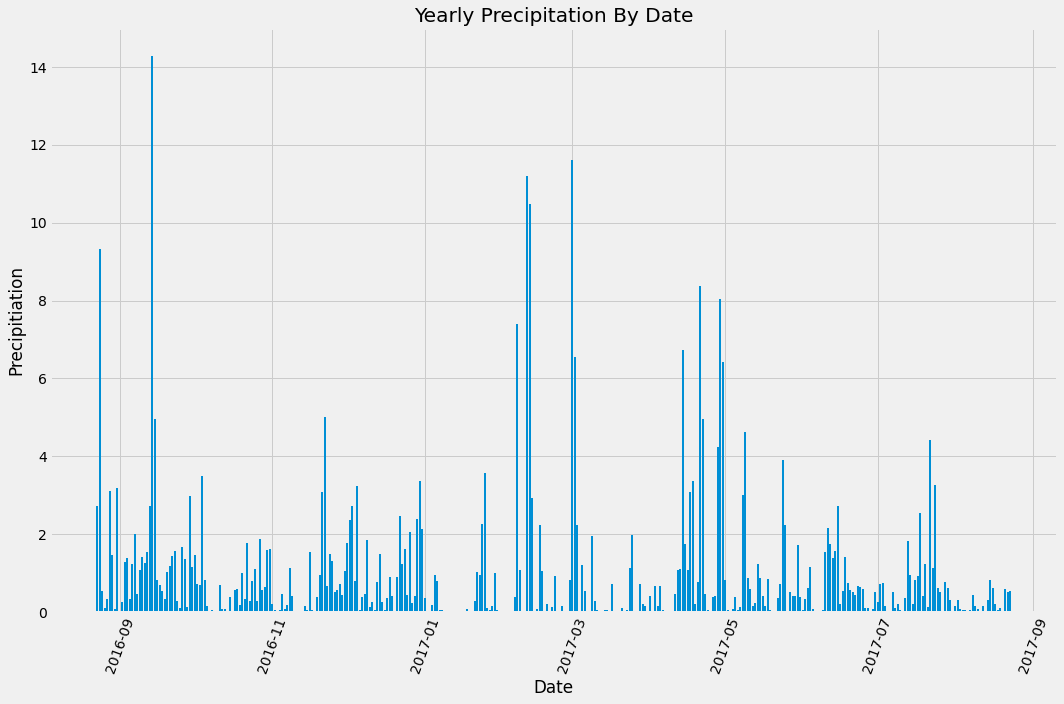

In [50]:
# Perform a query to retrieve the data and precipitation scores
# Find the most recent date in the data set.
OneYearPrecipitationDataByDay = engine.execute("SELECT * FROM Measurement WHERE Date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY Date ASC").fetchall()

#Checkscript
#print(OneYearPrecipitationDataByDay)


#Convert List containing MostRecentDate into a dataframe
OneYearPrecipitationDataByDate_df = pd.DataFrame(OneYearPrecipitationDataByDay, columns = ['id','station','date','prcp','tobs'])

#Review Dataframe with MostRecentDate 
#OneYearPrecipitationDataByDate_df.head()

#Check Datatype of column 
#OneYearPrecipitationDataByDate_df.dtypes

#Convert Column datatype from object to datetime
OneYearPrecipitationDataByDate_df['date'] = pd.to_datetime(OneYearPrecipitationDataByDate_df['date'])

#Check Datatype of column 
#OneYearPrecipitationDataByDate_df.dtypes

#Grouping Precipitation data by date
OneYearPrecipitationDataByDate = OneYearPrecipitationDataByDate_df.groupby(by=['date'])['prcp'].sum()

#Checkscript
#OneYearPrecipitationDataByDate.head()

#Convert List containing MostRecentDate into a dataframe
OneYearPrecipitationDataByDate_df = pd.DataFrame(OneYearPrecipitationDataByDate, columns = ['id','station','date','prcp','tobs'])

#Checkscript
#OneYearPrecipitationDataByDate_df.head()

del OneYearPrecipitationDataByDate_df['id']
del OneYearPrecipitationDataByDate_df['station']
del OneYearPrecipitationDataByDate_df['date']
del OneYearPrecipitationDataByDate_df['tobs']

OneYearPrecipitationDataByDate_df.reset_index(inplace=True)

OneYearPrecipitationDataByDate_df = OneYearPrecipitationDataByDate_df.rename(columns={'date': 'date'})

#Final Data Pull
#OneYearPrecipitationDataByDate_df.head(10)

#print(OneYearPrecipByStation_df)

#Populate the Empty Lists
DateList = OneYearPrecipitationDataByDate_df['date']
OneYearPrecipByDateList = OneYearPrecipitationDataByDate_df['prcp']


# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(DateList,OneYearPrecipByDateList)
plt.ylim(0, 15)
plt.xticks(rotation = 70)
plt.title("Yearly Precipitation By Date")
plt.xlabel("Date")
plt.ylabel("Precipitiation")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,8)
plt.show();

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summarystats = OneYearPrecipByStation_df['prcp'].describe()
#print (summarystats)

#Convert List containing MostRecentDate into a dataframe
summarystats_df = pd.DataFrame(summarystats)

#Checkscript
summarystats_df.head(8)

count      7.000000
mean      51.182857
std       47.604336
min        4.590000
25%       24.665000
50%       38.010000
75%       59.270000
max      147.810000
Name: prcp, dtype: float64


,prcp
count,7.000000
mean,51.182857
std,47.604336
min,4.590000
25%,24.665000
50%,38.010000
75%,59.270000
max,147.810000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset

# Query to pull back number of stations in the dataset
CountStationIDs = engine.execute("SELECT COUNT(DISTINCT(Station)) FROM Measurement WHERE Date BETWEEN '2016-08-23' AND '2017-08-23'").fetchall()

#Checkscript
#print(CountStationIDs)

#Convert List containing StationID Count into a dataframe
CountStationIDs_df = pd.DataFrame (CountStationIDs, columns = ['Station'])

#Chceckscript
#CountStationIDs_df.head()

#Review Dataframe with Info  
StationCount = CountStationIDs_df['Station'][0]

print(F"Total Count of Station IDs: {StationCount}");

Total Count of Station IDs: 7


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#####################
# In SQL
#####################
# Query to pull back stations grouped by measurements
ActiveStationList = engine.execute("SELECT DISTINCT(Station), COUNT(id) FROM Measurement WHERE Date BETWEEN '2016-08-23' AND '2017-08-23' GROUP BY Station ORDER BY COUNT(id) DESC").fetchall()

#Checkscript
#print(ActiveStationList)

#Convert List containing Active Station Data into a dataframe
ActiveStation_df = pd.DataFrame (ActiveStationList, columns = ['Station','id'])

#Chceckscript
ActiveStation_df.head(7)

#####################
# In Pandas/Python
#####################
#Grouping Precipitation data by stations
#MostActiveStationListing_df = OneYearPrecipitationData_df.groupby(['station']).count()

#Sorting the dataframe by the count of IDs
#MostActiveStationListing_df = MostActiveStationListing_df.sort_values(['id'], ascending=False)

#Final Data Pull
#MostActiveStationListing_df.head(10)

,Station,id
0,USC00519397,361
1,USC00519281,352
2,USC00516128,349
3,USC00513117,343
4,USC00519523,337
5,USC00514830,305
6,USC00517948,183


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to pull back measurements from most active station
MostActiveStationDataList = engine.execute("SELECT * FROM Measurement WHERE Station ='USC00519397' AND Date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY date DESC").fetchall()

#Checkscript
#print(MostActiveStationDataList)

#Convert List into a dataframe
MostActiveStation_df = pd.DataFrame (MostActiveStationDataList, columns = ['id','station','date','prcp','tobs'])

#Chceckscript
#MostActiveStation_df.head(361)

#Find Max, Min, and Average values using Pandas/Python
MostRain = MostActiveStation_df['prcp'].max()
LeastRain = MostActiveStation_df['prcp'].min()
AverageRain = MostActiveStation_df['prcp'].mean()

#Print Requested Data
print(F"Most Rain: {MostRain}, Least Rain: {LeastRain} , Average Rain: {AverageRain}")


Most Rain: 2.62, Least Rain: 0.0 , Average Rain: 0.044818941504178256


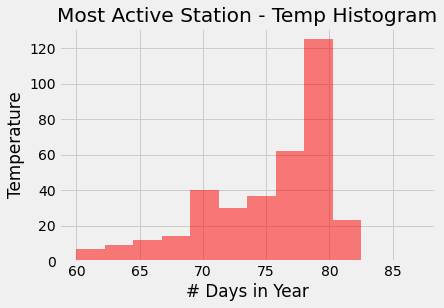

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Chceckscript
MostActiveStation_df.head(361)

#Sorting the dataframe by the date asc
MostActiveStation_df = MostActiveStation_df.sort_values(['date'], ascending=True)

#Re-index DataFrame
#MostActiveStation_df.reset_index(inplace=True)
#del MostActiveStation_df['index']
MostActiveStation_df = MostActiveStation_df.rename(columns={'level_0': 'index'})

#Chceckscript
#MostActiveStation_df.head(361)

#Empty List
TemperatureList=[]

#Populate list with data to be included/graphed
TemperatureList=MostActiveStation_df['tobs']

#plot histogram of Most active Station Data
num_bins = 12
n, bins, patches = plt.hist(TemperatureList, num_bins, facecolor='red', alpha=0.5)
plt.xlabel("# Days in Year")
plt.ylabel("Temperature")
plt.title("Most Active Station - Temp Histogram")
plt.show();

# Close session

In [51]:
# Close Session
session.close()